In [40]:
import message_ix
from message_ix import log
import ixmp as ix
import numpy as np
from scripts_for_diagnostics import *
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

fs = 18
plt.style.use('seaborn-ticks')
plt.rcParams['axes.labelsize'] = fs
plt.rcParams['xtick.labelsize'] = fs
plt.rcParams['ytick.labelsize'] = fs
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['axes.axisbelow'] = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
mp = ix.Platform('local',jvmargs=["-Xmx8G"])

In [21]:
# sc = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500",version=29) # scenario with 
sc_ref = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500",version=1)
scen_adjusted = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500", version=4)

In [22]:
###############################################
case = "old" # in this notebook, we make a diagnostic of the original formulation
###############################################
scenarios = {"old":sc_ref} 
scen = scenarios[case]
model_years = [x for x in scen.set("year") if x >= scen.firstmodelyear and x <= 2110]
curt_list = [x for x in scen.set("relation") if "curtailment" in x]
technologies = {
    "solar": [x for x in set(scen.set("technology")) if any([y in x for y in ["solar_res"]])], 
    "wind": [x for x in set(scen.set("technology")) if any([y in x for y in ["wind_res", "wind_ref"]])], 
    "wind curtailed": [x for x in set(scen.set("technology")) if "wind_curt" in x],
    "solar curtailed": [x for x in set(scen.set("technology")) if "solar_curt" in x],
    "storage": ["stor_ppl"],
    "export": [x for x in set(scen.set("technology")) if "elec_exp" in x],
    "import": [x for x in set(scen.set("technology")) if "elec_imp" in x],
    "e-mobility": ["elec_trp"],
    "electrolysis": ["h2_elec"],
    "fuel cell": ["h2_fc_I", "h2_fc_RC"],
    "load": ["elec_t_d"],
    }

bins = [1,2,3]

# Energy and capacity mix 

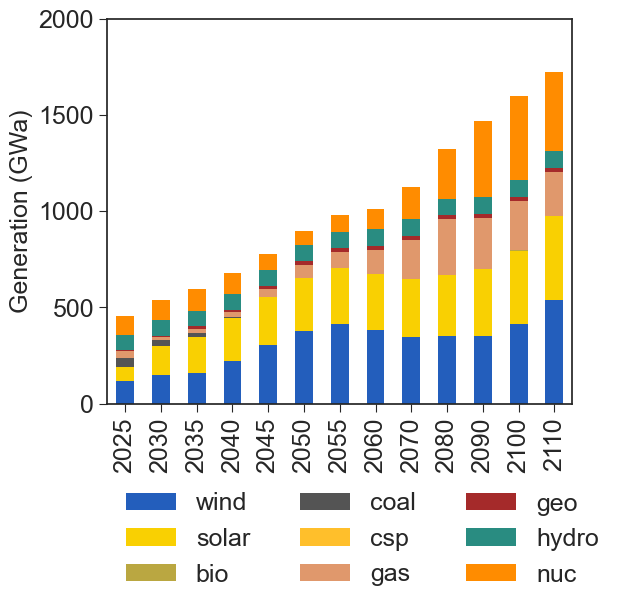

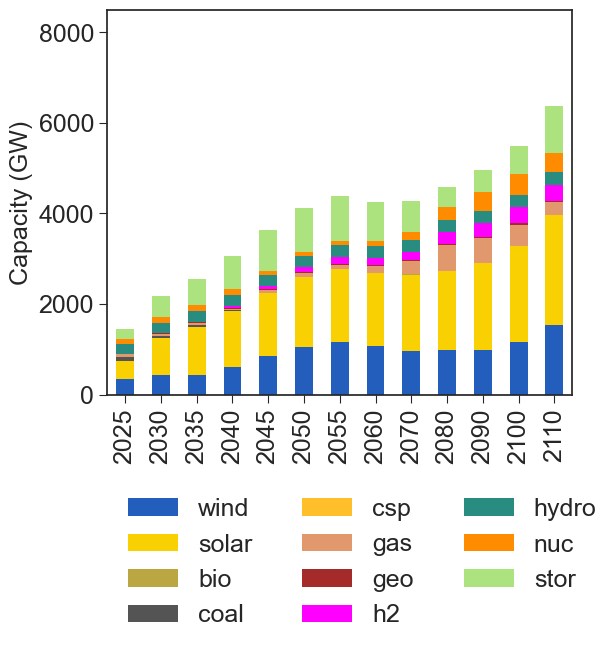

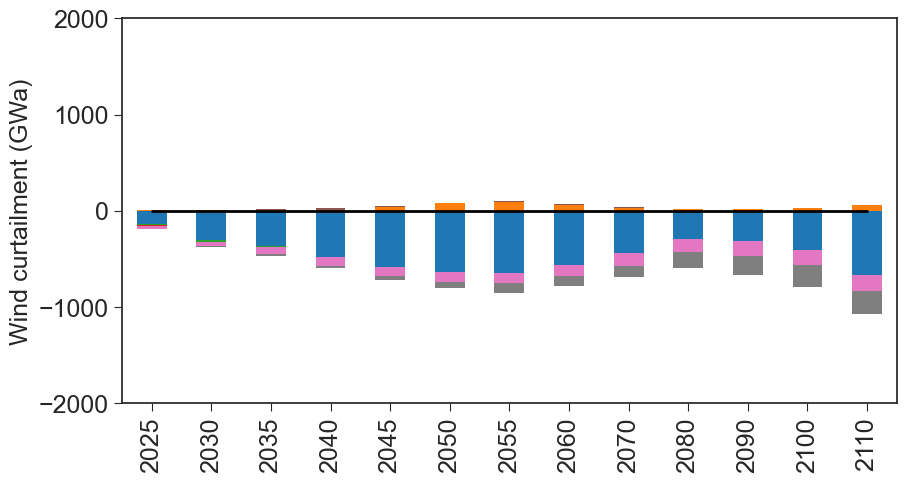

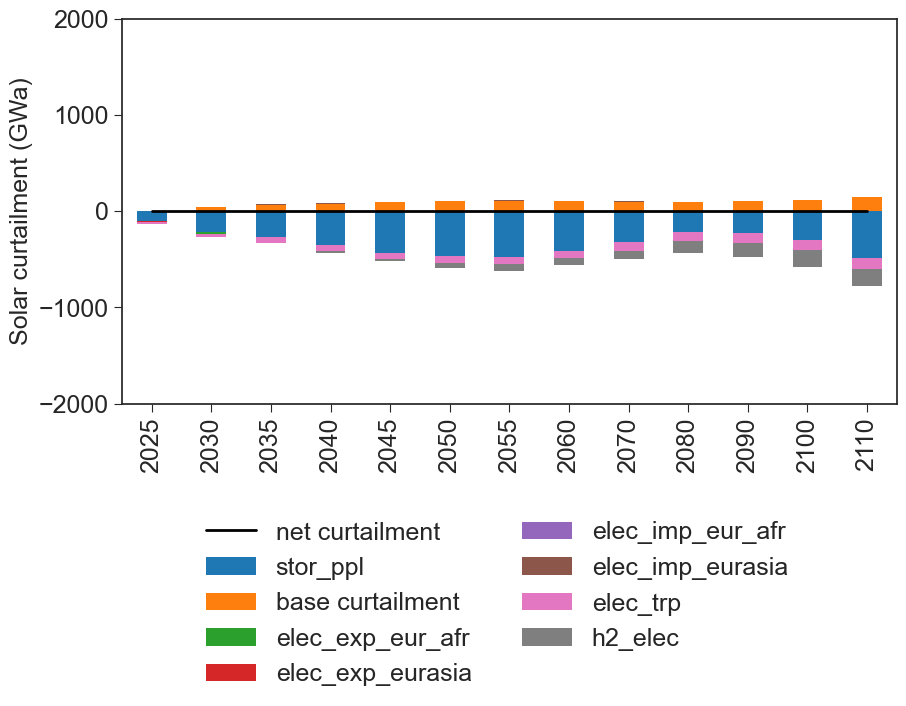

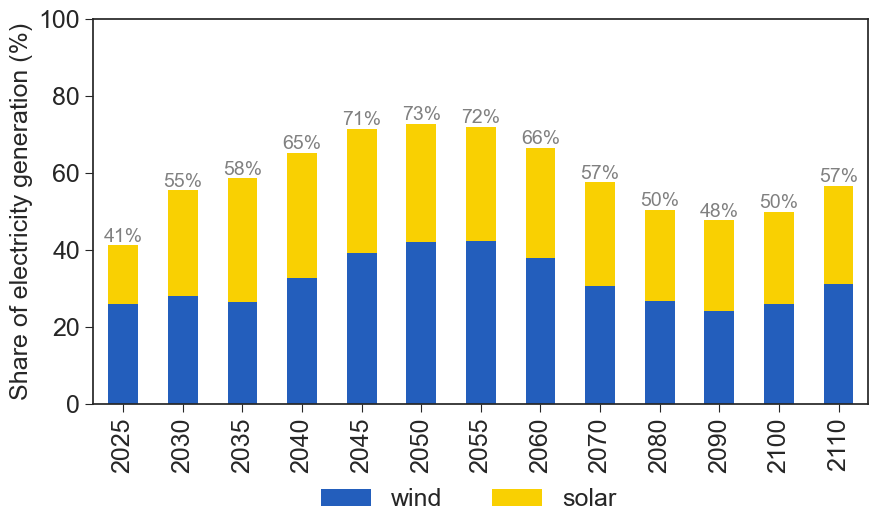

In [37]:
fig1, fig2, fig3, fig4, fig5, df_generation, df_capacity, tech_cap, tech_act, VRE_share = plot_generation_and_capacity(scen, technologies, model_years, bins)

fig1.savefig("figures/generation_current_formulation.png",
                bbox_inches="tight",
                dpi=300)

fig2.savefig("figures/capacity_current_formulation.png",
                bbox_inches="tight",
                dpi=300)

fig3.savefig("figures/wind_curtailment_current_formulation.png",
                bbox_inches="tight",
                dpi=300)

fig4.savefig("figures/solar_curtailment_current_formulation.png",
                bbox_inches="tight",
                dpi=300)

fig5.savefig("figures/VRE_share_current_formulation.png",
                bbox_inches="tight",
                dpi=300)
    

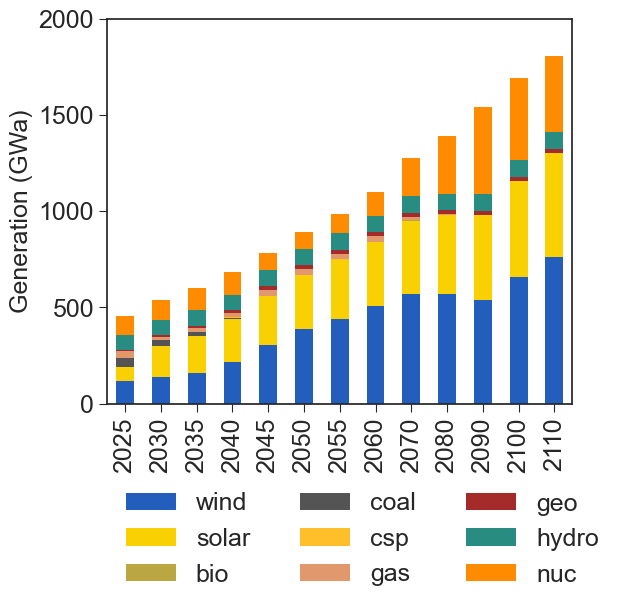

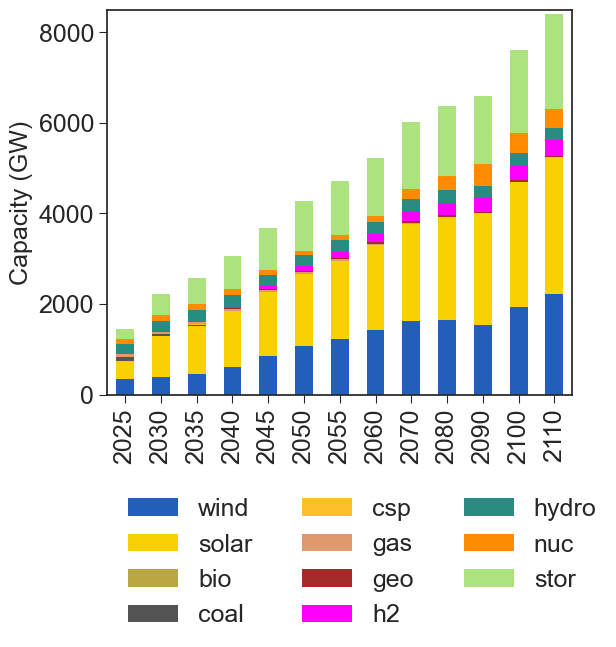

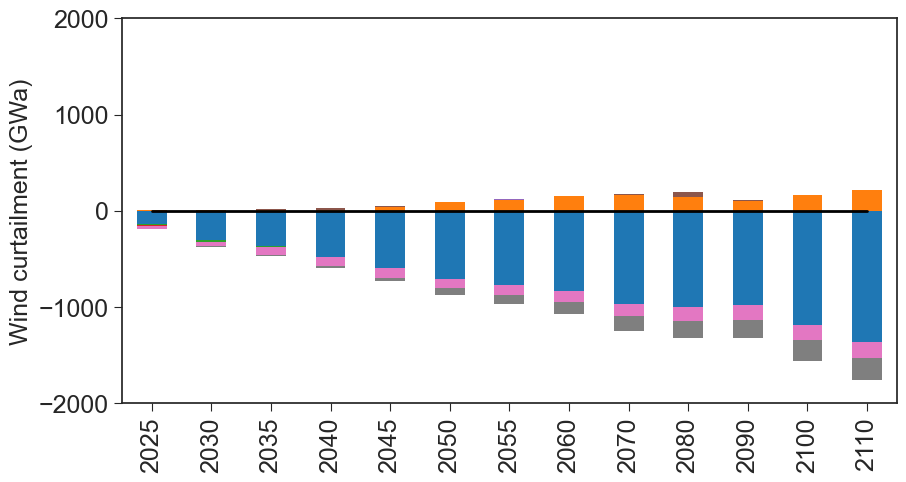

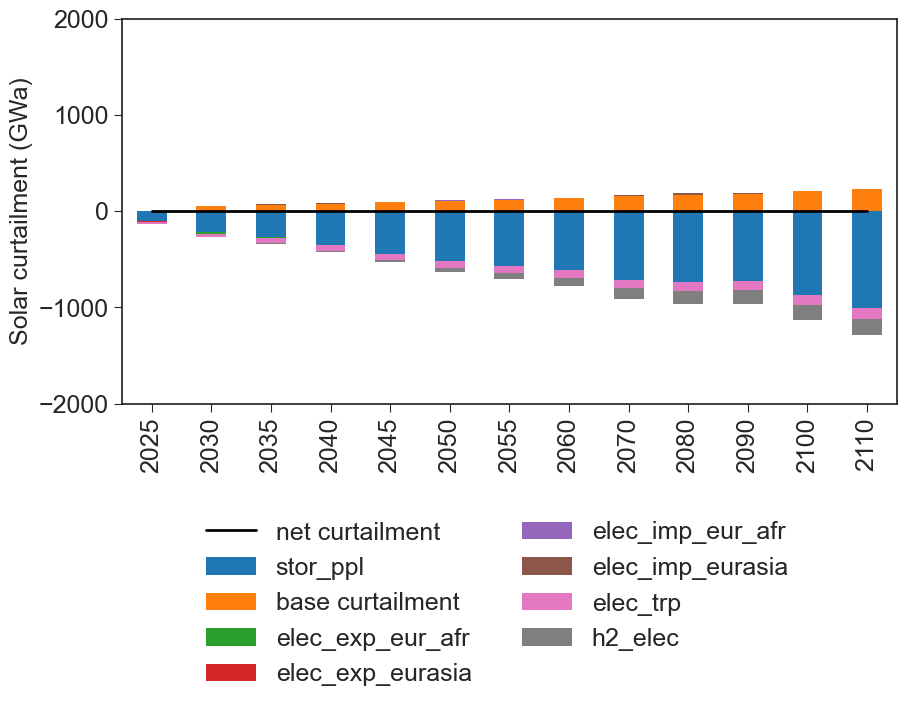

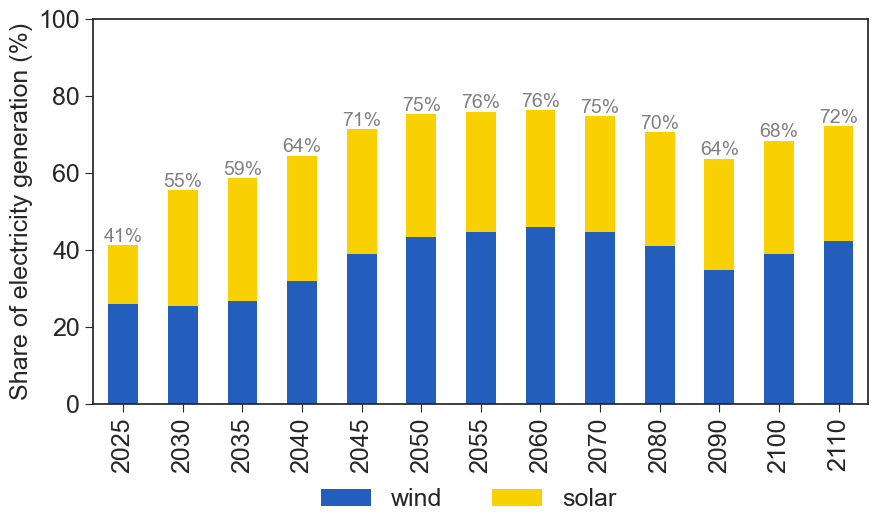

In [ ]:
fig1, fig2, fig3, fig4, fig5, df_generation_adjusted, df_capacity_adjusted, tech_cap_adjusted, tech_act_adjusted, VRE_share_adjusted  = plot_generation_and_capacity(scen_adjusted, technologies, model_years, bins)

fig1.savefig("figures/generation_adjusted_carbon_pricing.png",
                bbox_inches="tight",
                dpi=300)

fig2.savefig("figures/capacity_adjusted_carbon_pricing.png",
                bbox_inches="tight",
                dpi=300)

fig3.savefig("figures/wind_curtailment_adjusted_carbon_pricing.png",
                bbox_inches="tight",
                dpi=300)

fig4.savefig("figures/solar_curtailment_adjusted_carbon_pricing.png",
                bbox_inches="tight",
                dpi=300)

fig5.savefig("figures/VRE_share_adjusted_carbon_pricing.png",
                bbox_inches="tight",
                dpi=300)

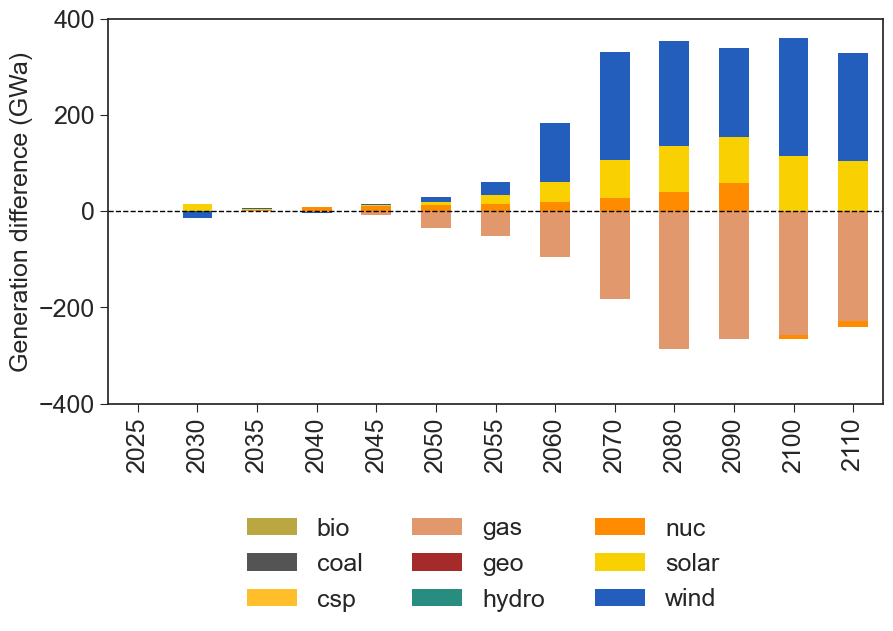

In [ ]:
df_diff = (df_generation_adjusted - df_generation)
fig, ax = plt.subplots(figsize=(10,5))
df_diff.plot.bar(stacked=True, ax = ax,
                 color=[colors_dict[i] for i in df_diff.columns])

ax.set_ylabel("")
ax.axhline(0,color="k",ls="--",lw=1)
ax.set_ylim(-400,400)
ax.legend().remove()
ax.set_xlabel("")
ax.set_ylabel("Generation difference (GWa)")
fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.35), ncol=3, fontsize=fs)

In [1]:
df_diff = (df_capacity_adjusted - df_capacity)
fig, ax = plt.subplots(figsize=(10,5))
df_diff.plot.bar(stacked=True, ax = ax,
                 color=[colors_dict[i] for i in df_diff.columns])

ax.set_ylabel("")
ax.axhline(0,color="k",ls="--",lw=1)
ax.set_ylim(-3000,3000)
ax.legend().remove()
ax.set_xlabel("")
ax.set_ylabel("Capacity difference (GW)")
fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.35), ncol=3, fontsize=fs)

NameError: name 'df_capacity_adjusted' is not defined

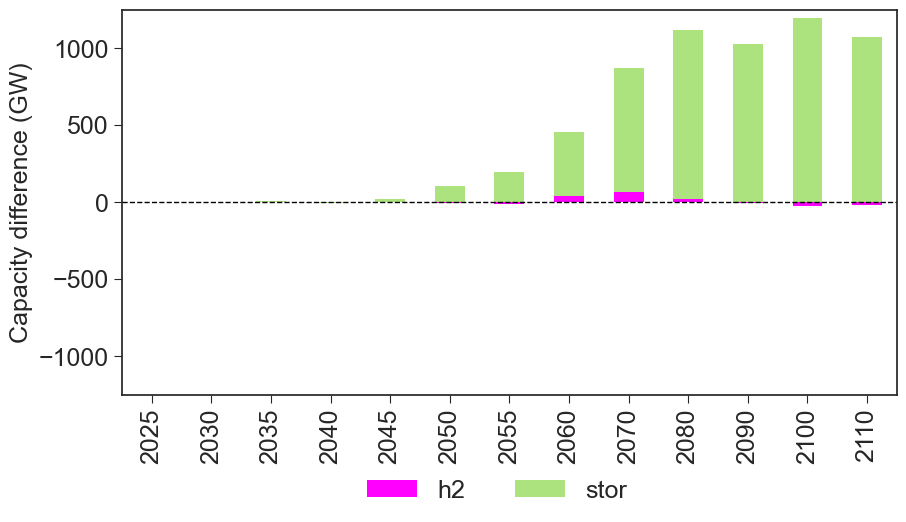

In [ ]:
df_diff = (tech_cap_adjusted - tech_cap)
df_diff = df_diff.unstack().T
df_diff.rename(columns={"h2_elec":"h2","stor_ppl":"stor"},inplace=True)
fig, ax = plt.subplots(figsize=(10,5))
df_diff.plot.bar(stacked=True, ax = ax,
                 color=[colors_dict[i] for i in df_diff.columns])

ax.set_ylabel("")
ax.axhline(0,color="k",ls="--",lw=1)
ax.set_ylim(-1250,1250)
ax.legend().remove()
ax.set_xlabel("")
ax.set_ylabel("Capacity difference (GW)")
fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=fs)

# Sensitivity to constraints

In [25]:
scen_all_included = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500") #,version=1)
scen_zero_curtailment = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_zero_curtail")
scen_slack_firm_capacity = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_100p_capacity_value")
scen_slack_flexibility = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_slack_firm_capacity",version=2) # was named wrongly before it was solved
scen_zero_integration_cost = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_zero_integration_cost")
scen_all_removed = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_zero_vre_integration_constraints")
#scen_wo_IC_C = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_integration_costs_and_curtailment")
scen_wo_IC_C = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_removing_IC_and_curtailment")
scen_wo_IC_wC = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_integration_costs_and_wind_curtailment")
scen_wo_IC_sC = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_integration_costs_and_solar_curtailment")

In [99]:
fig1, fig2, fig3, fig4, fig5, df_generation, df_capacity, tech_cap, tech_act, VRE_share_IC  = plot_generation_and_capacity(scen_zero_integration_cost, technologies, model_years, bins, plot=False)
fig1, fig2, fig3, fig4, fig5, df_generation, df_capacity, tech_cap, tech_act, VRE_share_Flex  = plot_generation_and_capacity(scen_slack_flexibility, technologies, model_years, bins, plot=False)
fig1, fig2, fig3, fig4, fig5, df_generation, df_capacity, tech_cap, tech_act, VRE_share_Firm  = plot_generation_and_capacity(scen_slack_firm_capacity, technologies, model_years, bins, plot=False)

In [79]:
fs = 12
plt.style.use('seaborn-ticks')
plt.rcParams['axes.labelsize'] = fs
plt.rcParams['xtick.labelsize'] = fs
plt.rcParams['ytick.labelsize'] = fs
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['axes.axisbelow'] = True

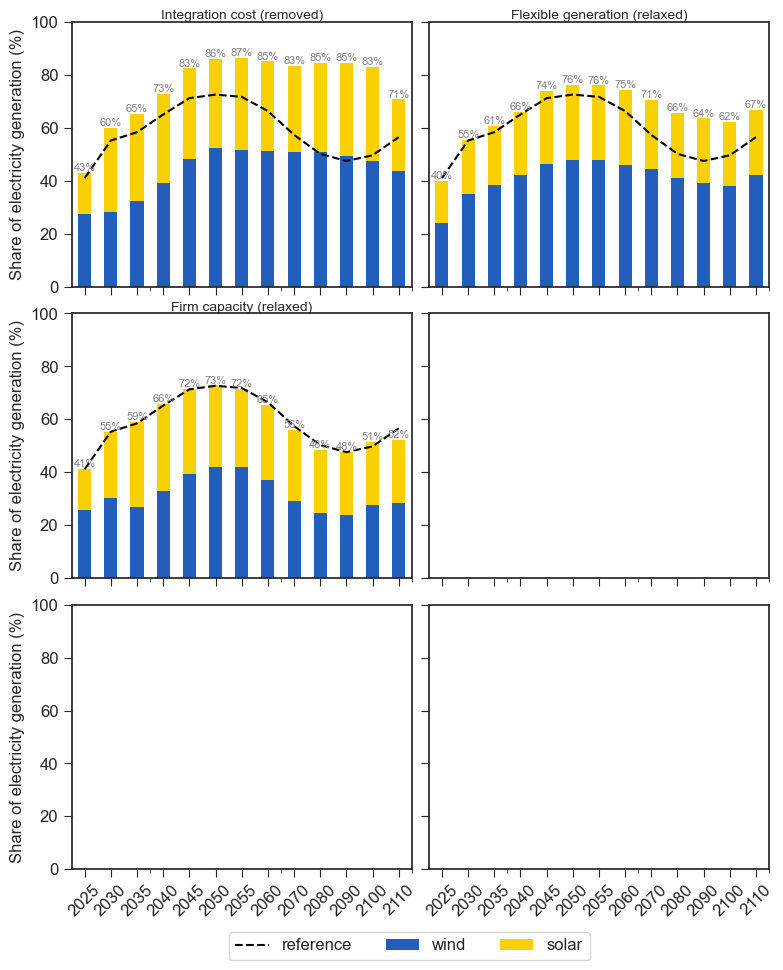

In [134]:
fig, ax = plt.subplots(figsize=(9,11),
                          sharex=True,
                          sharey=True,
                          ncols=2,
                          nrows=3)

axes = ax.flatten()

# reduce space between subplots
fig.subplots_adjust(hspace=0.1, wspace=0.05)

vre_shares_dict = {"Integration cost (removed)":VRE_share_IC,
                    "Flexible generation (relaxed)":VRE_share_Flex,
                    "Firm capacity (relaxed)":VRE_share_Firm}

ii = 0
for i in vre_shares_dict.keys():
    vre_share = vre_shares_dict[i]
    vre_share.plot(kind="bar", 
                   stacked=True, 
                   ax=axes[ii], 
                   color=[colors_dict[k] for k in VRE_share_IC.columns])
    axes[ii].plot(np.arange(13),VRE_share.sum(axis=1).values, color="black", linestyle="dashed", label="reference")
    axes[ii].legend().remove()
    axes[ii].set_title(i, fontsize=fs-2, pad=-5)
    for j in range(len(vre_share.index)):
        axes[ii].text(j, vre_share.iloc[j].sum(), str(int(round(vre_share.iloc[j].sum(),0))) + "%", ha="center", va="bottom", fontsize=fs-4, color="grey")
    ii += 1

ax[0,0].set_ylim(0,100)
ax[0,0].set_ylabel("Share of electricity generation (%)")
ax[1,0].set_ylabel("Share of electricity generation (%)")
ax[2,0].set_ylabel("Share of electricity generation (%)")

# rotate xtick labels 90 degrees
for tick in ax[2,0].get_xticklabels():
    tick.set_rotation(45)

for tick in ax[2,1].get_xticklabels():
    tick.set_rotation(45)
    
# only include legend labels for the first subplot
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.02), ncol=3, frameon=True, fontsize=fs)

fig.savefig("figures/VRE_share_constraints_sensitivity.png",
            bbox_inches="tight",
            dpi=300)



In [ ]:
mp.close_db()